# Predictive model for the Lunar albedo based on the chemical composition data from the Lunar Prospector.

Data source  - https://github.com/ML4SCI/ML4SCI_GSoC/tree/main/Messenger/Moon

**Note - For final results jump to last section of this notebook**

### Importing important python libraries for plotting and data preprocessing

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use('classic')
%matplotlib inline

from sklearn import metrics
sns.set()

# Part 1-  Data Preprocessing and Exploratory Data Analysis

 The data is stored in a CSV files with 360 rows and 720 columns. 
 
 The goal of data preprocessing is to convert the data in a format suitable for training and testing .
 

#### Step 1 - > Converting all the data frames into Numpy Matrix to divide the Left Side as Training and Right as Testing

In [85]:
albedo = pd.read_csv("Albedo_Map.csv",header=None);
Ti =  pd.read_csv("LPTi_Map.csv",header=None);
Fe =  pd.read_csv("LPFe_Map.csv",header=None);
K  =  pd.read_csv("LPK_Map.csv",header=None);
Th =  pd.read_csv("LPK_Map.csv",header=None);


alb = albedo.to_numpy()
ti = Ti.to_numpy() 
fe = Fe.to_numpy()
k = K.to_numpy()
th = Th.to_numpy()

alb_train = alb[:,:360]
alb_test = alb[:,360:]
ti_train = ti[:,:360]
ti_test = ti[:,360:]
fe_train = fe[:,:360]
fe_test = fe[:,360:]
k_train = k[:,:360]
k_test = k[:,360:]
th_train = th[:,:360]
th_test = th[:,360:]




Plotting to the original to check if the above conversion of successful

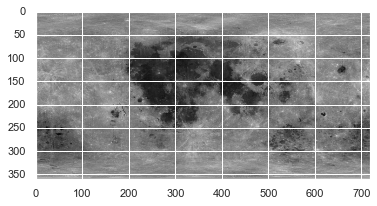

In [86]:
alb_final = np.concatenate((alb_train,alb_test), axis=1)

plt.imshow(alb_final, cmap="gray") 
plt.show() 


#### Step 2-> Flatting all the Matrices and stacking the left side and right side data to their respectively dataframes.

In [87]:
flat_alb_train = alb_train.flatten()
flat_alb_test = alb_test.flatten()

flat_ti_train = ti_train.flatten()
flat_ti_test = ti_test.flatten()

flat_fe_train = fe_train.flatten()
flat_fe_test= fe_test.flatten()

flat_k_train = k_train.flatten()
flat_k_test = k_test.flatten()

flat_th_train = th_train.flatten()
flat_th_test = th_test.flatten()

data_train = {'Ti':flat_ti_train, 
        'Fe':flat_fe_train, 
        'K':flat_k_train, 
        'Th':flat_th_train, 
        'Albedo':flat_alb_train} 
data_test = {'Ti':flat_ti_test, 
        'Fe':flat_fe_test, 
        'K':flat_k_test, 
        'Th':flat_th_test, 
        'Albedo':flat_alb_test} 

LEFT = pd.DataFrame(data= data_train)
RIGHT = pd.DataFrame(data= data_test)



#### Step 3-> Lets do some EDA 

Top five rows of the Left side Dataframe

In [88]:
LEFT.head()

,Ti,Fe,K,Th,Albedo
0,0.190154,4.04409,788.81,788.81,0.331936
1,0.190154,4.04409,788.81,788.81,0.332611
2,0.190154,4.04409,788.81,788.81,0.332240
3,0.190154,4.04409,788.81,788.81,0.331028
4,0.190154,4.04409,788.81,788.81,0.331094


**Lets get some insights about the data using info() and describe() methods.**

In [89]:
LEFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129600 entries, 0 to 129599
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ti      129600 non-null  float64
 1   Fe      129600 non-null  float64
 2   K       129600 non-null  float64
 3   Th      129600 non-null  float64
 4   Albedo  129600 non-null  float64
dtypes: float64(5)
memory usage: 4.9 MB


In [90]:
LEFT.describe()

,Ti,Fe,K,Th,Albedo
count,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000
mean,0.604026,5.734629,853.252498,853.252498,0.285794
std,0.904006,4.134721,824.795878,824.795878,0.057578
min,0.000000,0.271907,0.000000,0.000000,0.096897
25%,0.069470,3.306880,310.490000,310.490000,0.258126
50%,0.277718,4.019060,539.460000,539.460000,0.303909
75%,0.626194,6.295210,1116.425000,1116.425000,0.324932
max,6.135470,23.901800,4356.400000,4356.400000,0.470428


**Let's explore some relationships among the variables if any across the entire data set**

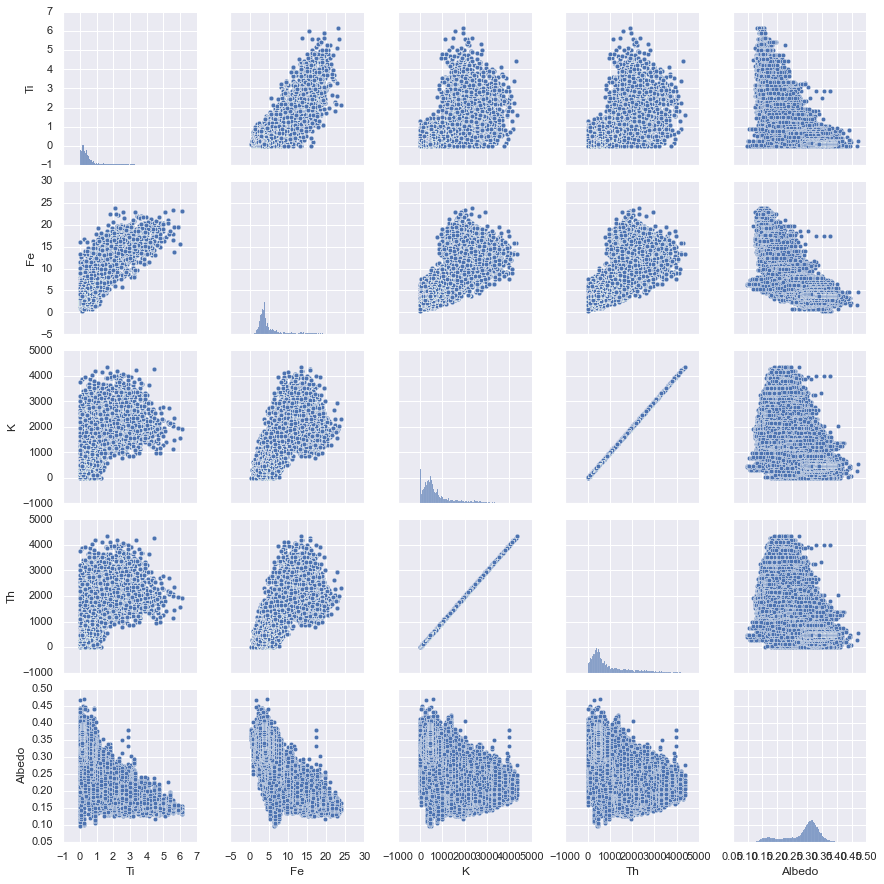

In [91]:
sns.pairplot(LEFT)

## Ingsights from the plots above

1) Almost all of the variables are heavly skewed.

2) Some correlation can also be obeserved , so lets plot the correlation matrix to understand it better

<AxesSubplot:>

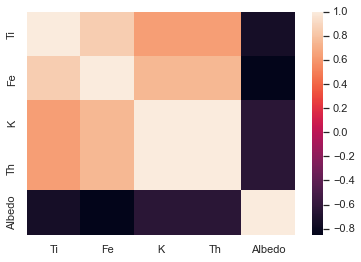

In [92]:
sns.heatmap(LEFT.corr())

# Part 2- Machine Learning 

The goal is to build a regression model using different machine learning algorithms to predict the brightness of each pixel using the left side of the albedo as training data and right side as the test data.

****For all the models these steps will be followed :-****

**1) Fitting the regressor object on the hyperparameters obtained using GridSearch**

**2) Print the details about the model (Correlation(R) bewtween actual and predicted values, evaluation metrics etc.**

**3) Plotting the predictions and 2-D image and residuals as 1-D histogram**

Note the final peformace would be compared using **Mean Square Error(MSE)** as its a good evaluation metric for regression models

#### First and foremost lets divide the data in train and test and do feature scaling

In [93]:
X_train = LEFT.iloc[:, :-1].values
y_train = LEFT.iloc[:, 4].values
X_test = RIGHT.iloc[:, :-1].values
y_test = RIGHT.iloc[:, 4].values

In [94]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## 1)Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test

In [96]:
print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


About Model
R: 0.7269141920289073
Adj R^2: 0.7269057631293983 

Model Evaluation
MAE: 0.024634054761986993
MSE: 0.001025152221398643
RMSE: 0.03201799839775502


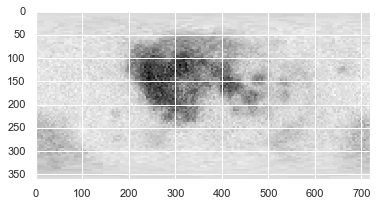

In [97]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show() 


C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

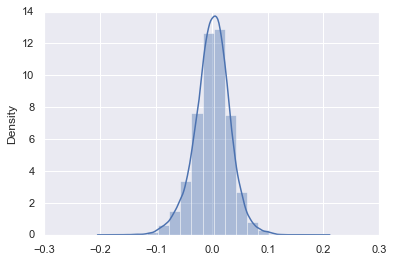

In [98]:
sns.distplot(residuals,bins=20)

## The MSE is 0.001025152221398643


## Insights 

- As expected the Linear Regression doesnt perform well as the data doesnt seem to be linearly seperable and there is correlation among the features .

## 2)Support Vector Machine Regressor

In [99]:
from sklearn.svm import SVR

**Note - Many instances of Grid Seach using different values of hyperparameter have been done but all have not been shown** 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,500],  
              'gamma': [ 0.003, 0.03,0.3,1],
              'kernel': ['linear']}  

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 4,cv=3,scoring='neg_mean_squared_error'
) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] C=0.1, degree=2, gamma=0.003, kernel=poly .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, degree=2, gamma=0.003, kernel=poly, score=-0.003, total=   3.2s
[CV] C=0.1, degree=2, gamma=0.003, kernel=poly .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=0.003, kernel=poly, score=-0.003, total=   3.1s
[CV] C=0.1, degree=2, gamma=0.03, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=0.03, kernel=poly, score=-0.003, total=   2.3s
[CV] C=0.1, degree=2, gamma=0.03, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=0.03, kernel=poly, score=-0.002, total=   1.9s
[CV] C=0.1, degree=2, gamma=0.3, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.3, kernel=poly, score=-0.003, total=   2.8s
[CV] C=0.1, degree=2, gamma=0.3, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.3, kernel=poly, score=-0.002, total=   3.6s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=-0.003, total=   4.2s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=-0.002, total=   5.6s
[CV] C=500, degree=2, gamma=0.003, kernel=poly .......................
[CV]  C=500, degree=2, gamma=0.003, kernel=poly, score=-0.003, total=   2.8s
[CV] C=500, degree=2, gamma=0.003, kernel=poly .......................
[CV]  C=500, degree=2, gamma=0.003, kernel=poly, score=-0.002, total=   2.6s
[CV] C=500, degree=2, gamma=0.03, kernel=poly ..

In [20]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.003, 'kernel': 'linear'}
SVR(C=10, gamma=0.003, kernel='linear')


The linear model was performing poorly and using gussian kernel gave better results

In [211]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.001)


**After doing grid search and experimenting with the hyperparameters C=2700 and gamma = 0.00008 gave the best results**

In [100]:
regressor =SVR(C=2700, gamma=0.00008)
regressor.fit(X_train,y_train)

# Predicting the Test set results

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test

In [101]:
print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

About Model
R: 0.7315202355908725
Adj R^2: 0.7315119488586865 

Model Evaluation
MAE: 0.025486332051266228
MSE: 0.0010564847231500207
RMSE: 0.03250361092478835


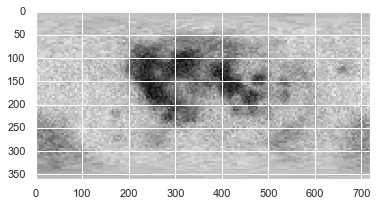

In [102]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show() 

C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

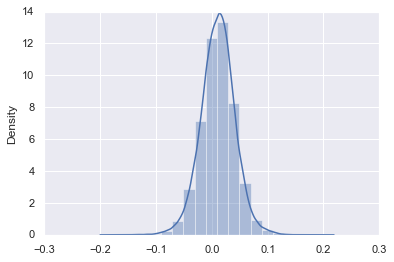

In [103]:
sns.distplot(residuals,bins=20)

## The MSE is 0.0010564847231500207


## Insights 

- The image looks better than the one obtained through Linear Regression even though the MSE is slightly higher , their is scope for improvement



# 3)Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor 

### Tuning the hyperparameter n_estimators and plotting the results

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
error_rate_test = []
error_rate_train=[]

for iter in range(10):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_train_predicted)
    mse_test = metrics.mean_squared_error(y_test, y_test_predicted)
    error_rate_train.append( metrics.mean_squared_error(y_train, y_train_predicted))
    error_rate_test.append(metrics.mean_squared_error(y_test, y_test_predicted))
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    rf.n_estimators += 100

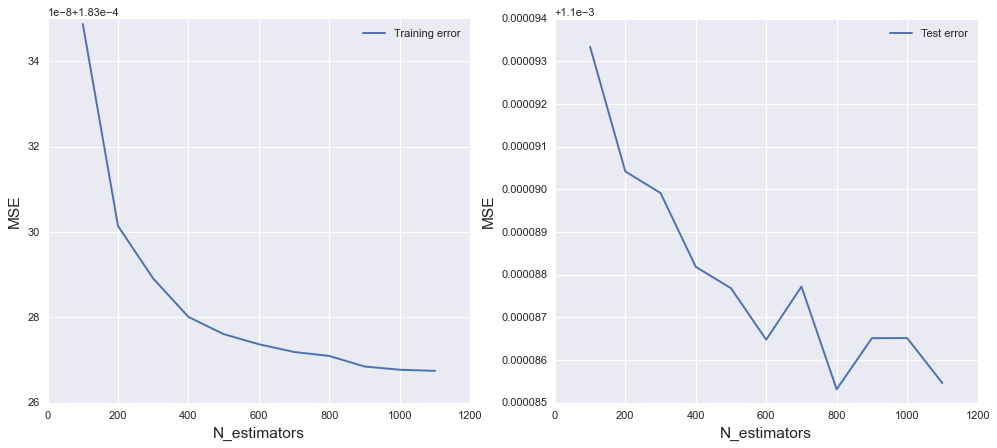

In [264]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)

plt.style.use('seaborn')
plt.plot(range(100,1200,100),error_rate_train, label = 'Training error')
# plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()
plt.subplot(1, 2, 2)

plt.style.use('seaborn')
plt.plot(range(100,1200,100),error_rate_test, label = 'Test error')
# plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()



**Note - Many instances of Grid Seach using different values of hyperparameter have been done but all have not been shown** 

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [50,250,500,1000],
 'max_depth': [5,10], 
 'max_features' :["sqrt"],
'min_samples_leaf':[5,10]


}
]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error',verbose=5)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_params_


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 800}

**After analying the above graph and doing grid search and experimenting with the hyperparameters max_features='sqrt',max_depth=10,min_samples_leaf=5,n_estimators=600 gave the best results**

In [105]:
# create regressor object 
regressor = RandomForestRegressor(max_features='sqrt',max_depth=10,min_samples_leaf=5,n_estimators=600) 
 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [106]:
print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

About Model
R: 0.8650076764859093
Adj R^2: 0.8650035098954231 

Model Evaluation
MAE: 0.02397092104795579
MSE: 0.0009863683743361737
RMSE: 0.03140650210284765


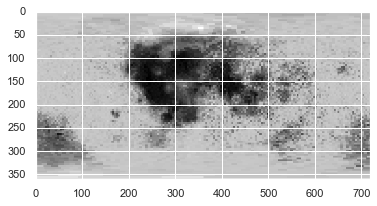

In [107]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show() 

C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

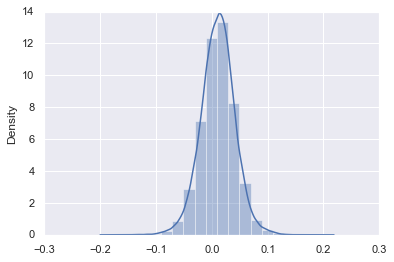

In [108]:
sns.distplot(residuals,bins=20)

## The MSE is 0.000986584356014296


## Insights 

- The Model perform better than all the above ones wrt MSE but even after doing hours of grid search and hyperparameter tuning it has overfitted to the left portion as its clearly visible from the image . 

# 4)XGBOOST 

In [109]:
import pickle
import xgboost
regressor=xgboost.XGBRegressor()

**Hyperparameter tuning using RandomizedSearchCV**

In [135]:
# Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defineing the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Using RandomizedSearchCV for creating model

from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 14.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 25.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 35.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [138]:
random_cv.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**The hyperparameters obtained using the above method gave the best results**

In [110]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

regressor.fit(X_train,y_train)
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test

In [111]:
print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


About Model
R: 0.7903649932835797
Adj R^2: 0.7903585228176908 

Model Evaluation
MAE: 0.02334789735875415
MSE: 0.0009304179266331601
RMSE: 0.03050275277140016


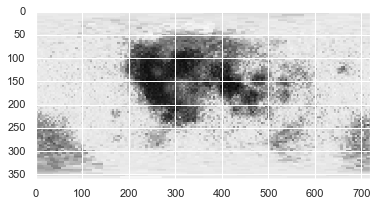

In [112]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show() 

C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

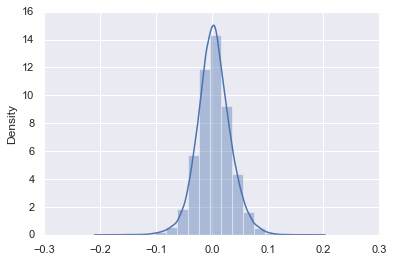

In [113]:
sns.distplot(residuals,bins=20)

## Insights

- Looks like we have a winner here, as the MSE is the lowest obtained will now and Image also looks good on both the sides
- XGBoost is one of the most powerful ML algorithm

## The MSE is 0.0009304179266331601

In [114]:
filename = 'Best_Model_XG_boost.sav'
pickle.dump(regressor, open(filename, 'wb'))

## 5) Neural Network 

Lets wrap things up by trying a Neural Network 


In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow import keras


In [162]:
def create_model(learn_rate=0.01):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4))
    # model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(4))
    model.add(tf.keras.layers.Dense(4))
    model.add(tf.keras.layers.Dense(1))

    opt = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(loss='mse', optimizer=opt)
    return model

In [167]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_model)
learn_rate = [0.001]
batch_size = [10,32]
epochs = [10, 50]
param_grid = dict(learn_rate=learn_rate,batch_size=batch_size,epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=5,verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed: 15.5min remaining:  3.9min
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 18.7min finished


Epoch 1/10
12960/12960 [==============================] - 9s 674us/step - loss: 0.0020
Epoch 2/10
12960/12960 [==============================] - 8s 633us/step - loss: 9.6331e-04 0s - 
Epoch 3/10
12960/12960 [==============================] - 8s 647us/step - loss: 9.4482e-04
Epoch 4/10
12960/12960 [==============================] - 8s 636us/step - loss: 9.3448e-04
Epoch 5/10
12960/12960 [==============================] - 8s 649us/step - loss: 9.2869e-04
Epoch 6/10
12960/12960 [==============================] - 8s 642us/step - loss: 9.2543e-04 0s - loss: 9. - ETA: 0s - loss: 
Epoch 7/10
12960/12960 [==============================] - 9s 659us/step - loss: 9.2414e-04
Epoch 8/10
12960/12960 [==============================] - 8s 637us/step - loss: 9.2317e-04 0s - lo
Epoch 9/10
12960/12960 [==============================] - 8s 654us/step - loss: 9.2217e-04
Epoch 10/10
12960/12960 [==============================] - 8s 635us/step - loss: 9.1936e-04 2s - los - ETA: 1s - loss: 9.2613 - E


In [168]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.001006 using {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001}


**After doing grid search and experimenting with the hyperparameters 'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001 gave the best MSE**

In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(4))

model.add(tf.keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='mse')
# This builds the model for the first time:
history  = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
12960/12960 [==============================] - 15s 1ms/step - loss: 0.0258 - val_loss: 0.0012
Epoch 2/10
12960/12960 [==============================] - 14s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 3/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.7602e-04 - val_loss: 0.0011
Epoch 4/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.4282e-04 - val_loss: 0.0011
Epoch 5/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.3182e-04 - val_loss: 0.0010
Epoch 6/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.2635e-04 - val_loss: 0.0011los - ETA: 3s - loss: 9.2873 - ETA: 3s - -  - ETA: 
Epoch 7/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.2393e-04 - val_loss: 0.0011
Epoch 8/10
12960/12960 [==============================] - 15s 1ms/step - loss: 9.2204e-04 - val_loss: 0.0010
Epoch 9/10
12960/12960 [==============================] - 14s 1ms/step - loss: 9.1999

In [49]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (10, 4)                   20        
_________________________________________________________________
dense_1 (Dense)              (10, 4)                   20        
_________________________________________________________________
dense_2 (Dense)              (10, 4)                   20        
_________________________________________________________________
dense_3 (Dense)              (10, 1)                   5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


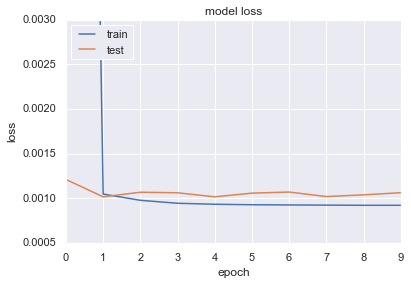

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim(0.0005,0.003)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Surprisingly the training loss convereged after just 2-3 epochs, this may have to do with the hyperparameters

In [115]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.flatten()
y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.flatten()
residuals  = y_test-y_pred_test


In [116]:
print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Model Evaluation
MAE: 0.025004365150974633
MSE: 0.0010610954305026602
RMSE: 0.032574459788347374


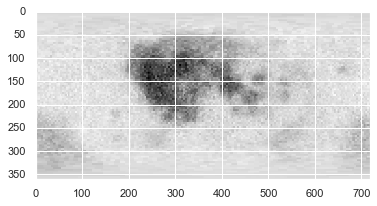

In [117]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show() 

C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

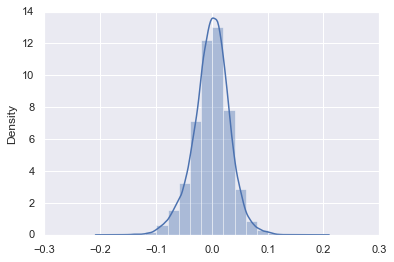

In [118]:
sns.distplot(residuals,bins=20)


## Insights

- Surprisingly even after tuning and experting with a bigger and deeper nn ,the results were still poor.
- This may have to do with the less no. of input features and also lack of computional resourecs for doing a extensive grid with more hyperparameter tuning

## The MSE is 0.0010610954305026602


# Final Results and Insights

**The best image and lowest MSE obtained was with the tuned XGBOOST model** 

MSE: 0.0009304179266331601


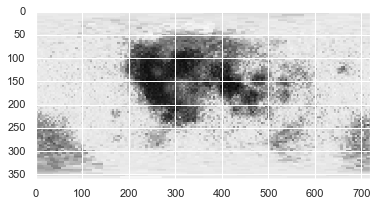

In [76]:
filename = 'Best_Model_XG_boost.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_train = loaded_model.predict(X_train)
y_pred_test = loaded_model.predict(X_test)
residuals  = y_test-y_pred_test
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)

plt.imshow(y_img, cmap="gray") 

plt.show() 



C:\Users\shiva\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

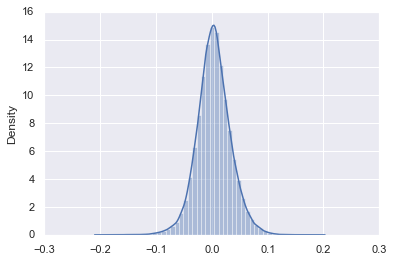

In [77]:
sns.distplot(residuals,bins=20)


# Insights

- Best results were obtained using **XGBOOST, a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.**
- Neural Networks surprisingly didnt perform as well as expected even after basic hyper parameter tuning , but their maybe a scope of improvement.
- Only having 4 features for prediction may also be a reason that most models fail to perform well.
